# Unsupervised learning and dimensionality reduction

We gonna explore those hidden groups in our data, using clustering techniques with KNN model and dimensionality reduction with UMAP learn, to visualize our data in 2 dimensions and have an idea of the performance of the model

## Preparing environment

In [10]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import umap
import sys
sys.path.append('../high_performance_employee_resign_prediction')
from utils import paths

## Importing data

In [2]:
train_df = pd.read_csv(paths.data_processed_dir('train_processed.csv'))
test_df = pd.read_csv(paths.data_processed_dir('test_processed.csv'))
train_reduced_df = pd.read_csv(paths.data_processed_dir('train_reduced_processed.csv'))
test_reduced_df = pd.read_csv(paths.data_processed_dir('test_reduced_processed.csv'))

## Extracting id_colaborador, id_ultimo_jefe and abandono_6meses

In [7]:
extrac_cols_train = train_df[['id_colaborador', 'id_ultimo_jefe', 'abandono_6meses']]
extrac_cols_test = test_df[['id_colaborador', 'id_ultimo_jefe']]

In [8]:
# Dropping those columns

train_df.drop(columns=['id_colaborador', 'id_ultimo_jefe', 'abandono_6meses'], inplace=True)
train_reduced_df.drop(columns=['id_colaborador', 'id_ultimo_jefe', 'abandono_6meses'], inplace=True)
test_df.drop(columns=['id_colaborador', 'id_ultimo_jefe'], inplace=True)
test_reduced_df.drop(columns=['id_colaborador', 'id_ultimo_jefe'], inplace=True)

## Applying Clustering in full data

In [22]:
# Determining the ideal neighbors

n_clusters = np.arange(1, 300)
inertia = []
for i in n_clusters:
    model = KMeans(n_clusters=i, n_init=10)
    model.fit(train_df)
    inertia.append(model.inertia_)

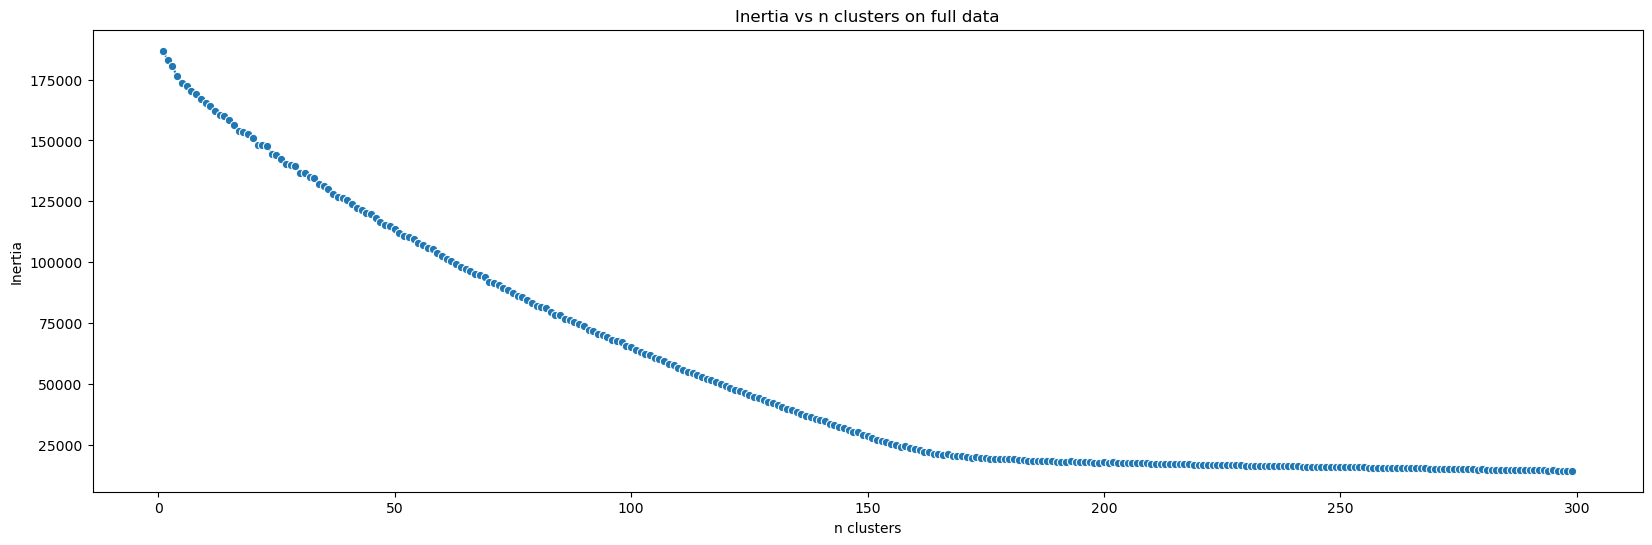

In [25]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.lineplot(x=n_clusters, y=inertia, marker='o', ax=ax)
ax.set_xlabel('n clusters')
ax.set_ylabel('Inertia')
ax.set_title('Inertia vs n clusters on full data')
plt.show()

The ideal number of clusters is about 160 clusters.

In [27]:
# Optimal KMeans for clustering

op_km_full = KMeans(n_clusters=160, random_state=42, n_init=10)
op_km_full.fit(train_df)
clusters = op_km_full.predict(train_df)

### Visualizing clusters in reduced dimensions

In [29]:
reducer = umap.UMAP(n_neighbors=13, min_dist=0.1, n_components=2, random_state=42)
reduced_dims_full = reducer.fit_transform(train_df)

d:\Data_Science\high_performance_employee_resign_prediction\venv\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


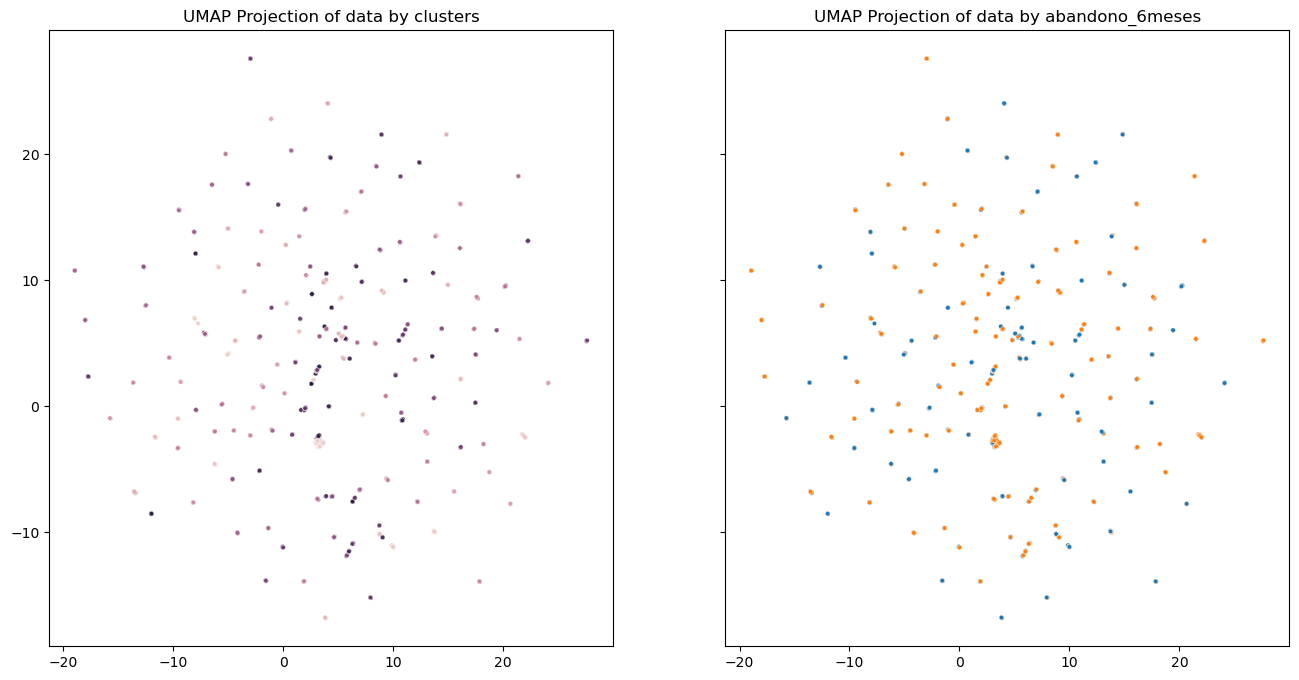

In [33]:
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(16, 8))
sns.scatterplot(x=reduced_dims_full[:, 0], y=reduced_dims_full[:, 1], hue=clusters, s=10, legend=None, ax=axs[0])
axs[0].set_title('UMAP Projection of data by clusters')
sns.scatterplot(x=reduced_dims_full[:, 0], y=reduced_dims_full[:, 1], hue=extrac_cols_train['abandono_6meses'], s=10, legend=None, ax=axs[1])
axs[1].set_title('UMAP Projection of data by abandono_6meses')
plt.show()

In [36]:
# Saving clusters in train data

train_df['cluster'] = clusters

In [34]:
# Now applying clustering into test data

clusters_test = op_km_full.predict(test_df)

In [35]:
# Reducing dimensions in test data

reduced_dims_full_test = reducer.transform(test_df)

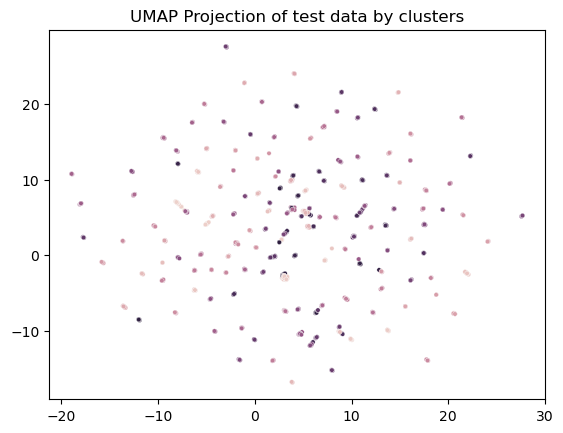

In [39]:
plt.figure()
sns.scatterplot(x=reduced_dims_full_test[:, 0], y=reduced_dims_full_test[:, 1], hue=clusters_test, s=10, legend=None)
plt.title('UMAP Projection of test data by clusters')
plt.show()

In [40]:
# Saving clusters in test data

test_df['cluster'] = clusters_test

## Applying clusters in reduced data

In [42]:
# Determining the ideal neighbors

n_clusters = np.arange(1, 300)
inertia = []
for i in n_clusters:
    model = KMeans(n_clusters=i, n_init=10)
    model.fit(train_reduced_df)
    inertia.append(model.inertia_)

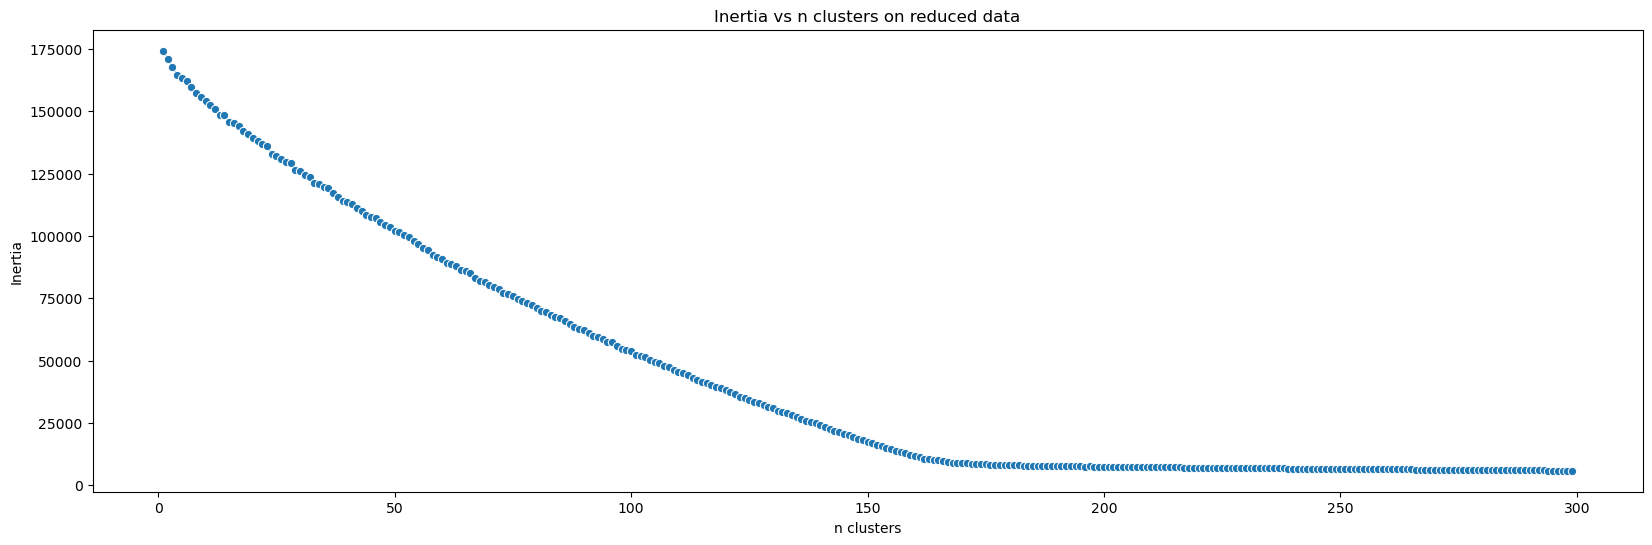

In [43]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.lineplot(x=n_clusters, y=inertia, marker='o', ax=ax)
ax.set_xlabel('n clusters')
ax.set_ylabel('Inertia')
ax.set_title('Inertia vs n clusters on reduced data')
plt.show()

Optimal clusters are 160 as well

In [44]:
# Optimal KMeans for clustering

op_km_red = KMeans(n_clusters=160, random_state=42, n_init=10)
op_km_red.fit(train_reduced_df)
clusters_red = op_km_red.predict(train_reduced_df)

### Visualizing clusters in reduced dimensions

In [45]:
reducer_red = umap.UMAP(n_neighbors=13, min_dist=0.1, n_components=2, random_state=42)
reduced_dims_red = reducer_red.fit_transform(train_reduced_df)

d:\Data_Science\high_performance_employee_resign_prediction\venv\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


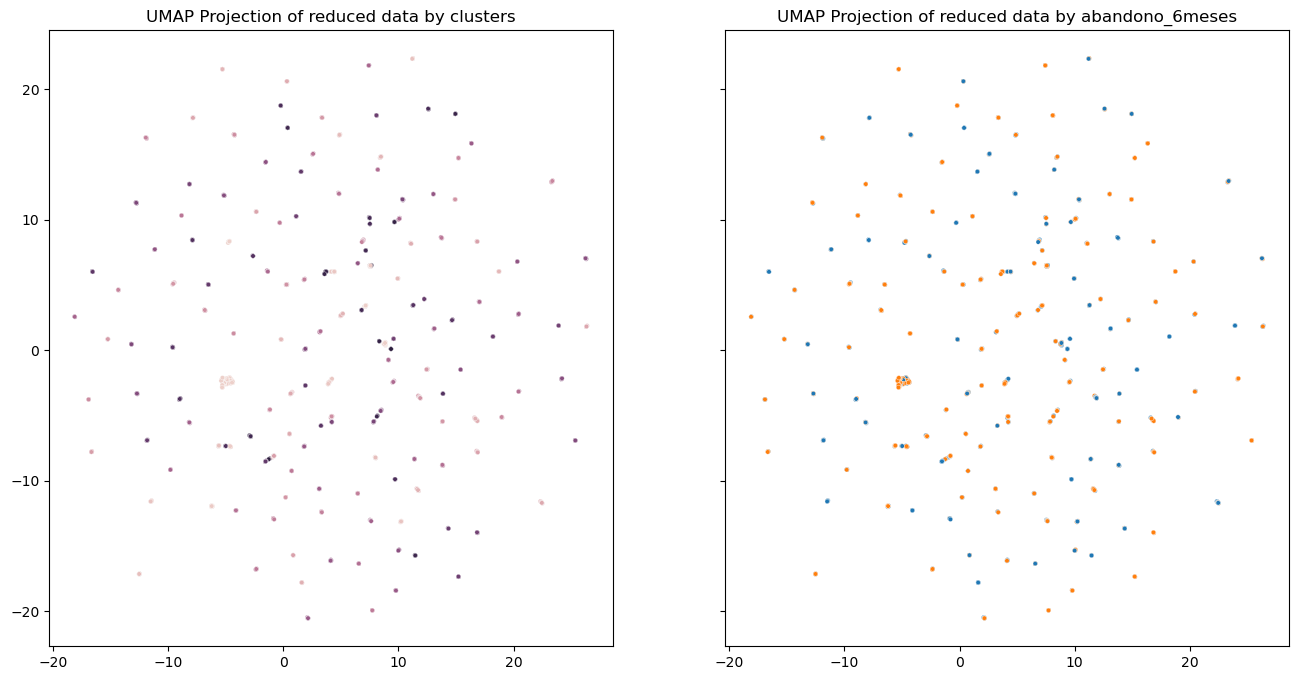

In [46]:
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(16, 8))
sns.scatterplot(x=reduced_dims_red[:, 0], y=reduced_dims_red[:, 1], hue=clusters_red, s=10, legend=None, ax=axs[0])
axs[0].set_title('UMAP Projection of reduced data by clusters')
sns.scatterplot(x=reduced_dims_red[:, 0], y=reduced_dims_red[:, 1], hue=extrac_cols_train['abandono_6meses'], s=10, legend=None, ax=axs[1])
axs[1].set_title('UMAP Projection of reduced data by abandono_6meses')
plt.show()

In [47]:
# Saving clusters in train data

train_reduced_df['cluster'] = clusters_red

In [48]:
# Now applying clustering into test data

clusters_red_test = op_km_red.predict(test_reduced_df)

In [50]:
# Reducing dimensions in test data

reduced_dims_red_test = reducer_red.transform(test_reduced_df)

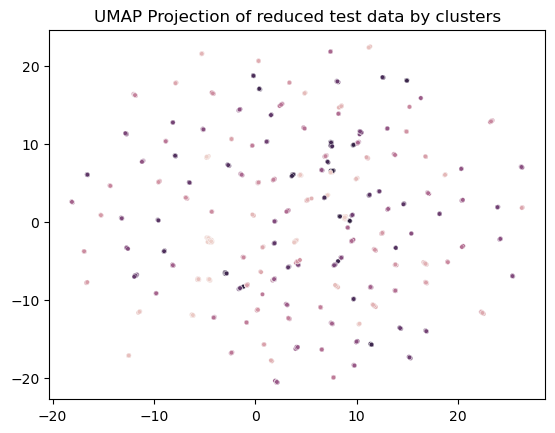

In [51]:
plt.figure()
sns.scatterplot(x=reduced_dims_red_test[:, 0], y=reduced_dims_red_test[:, 1], hue=clusters_red_test, s=10, legend=None)
plt.title('UMAP Projection of reduced test data by clusters')
plt.show()

In [52]:
# Saving clusters in test reduced data

test_reduced_df['cluster'] = clusters_red_test

## Saving clustered data and UMAP data in order to apply models

In [54]:
# Concatenating original data

train_final_df = pd.concat([train_df, extrac_cols_train], axis=1)
test_final_df = pd.concat([test_df, extrac_cols_test], axis=1)
train_reduced_final_df = pd.concat([train_reduced_df, extrac_cols_train], axis=1)
test_reduced_final_df = pd.concat([test_reduced_df, extrac_cols_test], axis=1)

In [64]:
# Saving original clustered data

train_final_df.to_csv(paths.data_processed_dir('train_cluster_full.csv'), index=False, sep=',')
test_final_df.to_csv(paths.data_processed_dir('test_cluster_full.csv'), index=False, sep=',')
train_reduced_final_df.to_csv(paths.data_processed_dir('train_cluster_red.csv'), index=False, sep=',')
test_reduced_final_df.to_csv(paths.data_processed_dir('test_cluster_red.csv'), index=False, sep=',')

In [68]:
# Concatenating UMAP dimensional data

umap_train_full = pd.concat([pd.DataFrame(reduced_dims_full, columns=['X', 'Y']), extrac_cols_train['abandono_6meses']], axis=1)
umap_test_full = pd.concat([pd.DataFrame(reduced_dims_full_test, columns=['X', 'Y']), extrac_cols_test['id_colaborador']], axis=1)
umap_train_red = pd.concat([pd.DataFrame(reduced_dims_red, columns=['X', 'Y']), extrac_cols_train['abandono_6meses']], axis=1)
umap_test_red = pd.concat([pd.DataFrame(reduced_dims_red_test, columns=['X', 'Y']), extrac_cols_test['id_colaborador']], axis=1)

In [73]:
# Saving UMAP data

umap_train_full.to_csv(paths.data_processed_dir('train_umap_full.csv'), index=False, sep=',')
umap_test_full.to_csv(paths.data_processed_dir('test_umap_full.csv'), index=False, sep=',')
umap_train_red.to_csv(paths.data_processed_dir('train_umap_red.csv'), index=False, sep=',')
umap_test_red.to_csv(paths.data_processed_dir('test_umap_red.csv'), index=False, sep=',')